/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/pyPhysChem



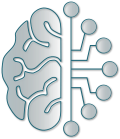

**Début à:** Wednesday 18 September 2024, 19:39:36  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

# Constantes Physiques et Mathématiques

## Introduction  



<div class="intro">

En chimie, on a fréquemment besoin d'utiliser des [constantes physiques](https://en.wikipedia.org/wiki/Physical_constant), telles que la vitesse de la lumière $c$, la masse du proton $m_p$, le nombre d'Avogadro $N_A$, la constante de Planck $h$, la constante des gaz parfaits $R$, etc...

Une constante physique est une quantité physique dont la valeur numérique est fixe. Contrairement à une constante mathématique, elle implique directement une grandeur physiquement mesurable.

On a souvent besoin également de certaines [constantes mathématiques](https://en.wikipedia.org/wiki/Mathematical_constant), comme le nombre $\pi$, le nombre d'Euler $e$, l'unité imaginaire $i$, etc...

La plupart de ces constantes sont disponibles dans la bibliothèque `SciPy`, qui est l’une des bibliothèques de Python permettant de faire le calcul scientifique. Celle-ci dépend de la bibliothèque `NumPy` qui permet la manipulation des tableaux à $N$ dimensions. La liste des constantes et des unités est disponible dans la [documentation en ligne de](https://docs.scipy.org/doc/scipy/reference/constants.html) `SciPy`, ou bien par l'utilisation d'une commande python. Pour y accéder, il faut importer `scipy.constants`.

</div>

In [3]:
import scipy.constants as sc

## Quelques exemples d'utilisation de `scipy.constants`

### Lister et rechercher les constantes physiques

<div class="intro">

On va utiliser la commande `find` de `SciPy` :
</div>

In [3]:
sc.find("")

['Angstrom star',
 'Avogadro constant',
 'Bohr magneton',
 'Bohr magneton in Hz/T',
 'Bohr magneton in K/T',
 'Bohr magneton in eV/T',
 'Bohr magneton in inverse meter per tesla',
 'Bohr radius',
 'Boltzmann constant',
 'Boltzmann constant in Hz/K',
 'Boltzmann constant in eV/K',
 'Boltzmann constant in inverse meter per kelvin',
 'Compton wavelength',
 'Cu x unit',
 'Faraday constant',
 'Fermi coupling constant',
 'Hartree energy',
 'Hartree energy in eV',
 'Josephson constant',
 'Loschmidt constant (273.15 K, 100 kPa)',
 'Loschmidt constant (273.15 K, 101.325 kPa)',
 'Mo x unit',
 'Newtonian constant of gravitation',
 'Newtonian constant of gravitation over h-bar c',
 'Planck constant',
 'Planck constant in eV/Hz',
 'Planck length',
 'Planck mass',
 'Planck mass energy equivalent in GeV',
 'Planck temperature',
 'Planck time',
 'Rydberg constant',
 'Rydberg constant times c in Hz',
 'Rydberg constant times hc in J',
 'Rydberg constant times hc in eV',
 'Sackur-Tetrode constant (1 K, 

<div class="rq">
    
La liste est impressionnante, et elle permet de comprendre l'intérêt d'utiliser ce package de `scipy`. Chaque ligne renvoie à la clef qui permet d'accéder à une constante physique, par exemple `'Avogadro constant'` pour le nombre d'Avogadro $N_A$.
</div>
<br>
<div class="intro">

Supposons maintenant qu'on veuille connaître les constantes physiques associées à l'électron. Il est inutile d'aller fouiller dans la longue liste qu'on vient d'afficher, il suffit de relancer la commande `find ` :
</div>

In [4]:
sc.find('electron')

['alpha particle-electron mass ratio',
 'atomic mass unit-electron volt relationship',
 'classical electron radius',
 'deuteron-electron mag. mom. ratio',
 'deuteron-electron mass ratio',
 'electron charge to mass quotient',
 'electron g factor',
 'electron gyromag. ratio',
 'electron gyromag. ratio in MHz/T',
 'electron mag. mom.',
 'electron mag. mom. anomaly',
 'electron mag. mom. to Bohr magneton ratio',
 'electron mag. mom. to nuclear magneton ratio',
 'electron mass',
 'electron mass energy equivalent',
 'electron mass energy equivalent in MeV',
 'electron mass in u',
 'electron molar mass',
 'electron relative atomic mass',
 'electron to alpha particle mass ratio',
 'electron to shielded helion mag. mom. ratio',
 'electron to shielded proton mag. mom. ratio',
 'electron volt',
 'electron volt-atomic mass unit relationship',
 'electron volt-hartree relationship',
 'electron volt-hertz relationship',
 'electron volt-inverse meter relationship',
 'electron volt-joule relationship',

### Valeur, unité et précision d'une constante fondamentale

<div class="intro">
    
Prenons l'exemple de la masse de l'électron. Après avoir affiché la clef qui indexe $m_e$, On va afficher sa valeur, son unité, et l'incertiture de cette constante.
</div>

In [14]:
print(sc.find("electron mass"))
print()
print(sc.physical_constants["electron mass"])

['alpha particle-electron mass ratio', 'deuteron-electron mass ratio', 'electron mass', 'electron mass energy equivalent', 'electron mass energy equivalent in MeV', 'electron mass in u', 'helion-electron mass ratio', 'muon-electron mass ratio', 'neutron-electron mass ratio', 'proton-electron mass ratio', 'tau-electron mass ratio', 'triton-electron mass ratio']

(9.1093837015e-31, 'kg', 2.8e-40)


<div class="intro">

On peut afficher et utiliser indépendamment chacune de ces variables à l'aide des fonctions `value`, `unit`, et `precision` du module `scipy.constants` :
</div>

In [21]:
print(sc.value("electron mass"))
print(sc.unit("electron mass"))
print(sc.precision("electron mass"))

9.1093837015e-31
kg
3.0737534961217373e-10


<div class="rq">

**Attention.** C'est une incertitude relative qui est renvoyée par la fonction `precision` alors que la fonction `physical_constants` renvoie l'incertitude absolue $\Delta m_{\mathrm{e}}$. On écrit la mesure avec son incertitude absolue :
    
$$m_{\mathrm{e}}\pm\Delta m_{\mathrm{e}}$$

ce qui veut dire que $m_{\mathrm{e}}$ est en réalité compris entre deux valeurs $m_{\mathrm{e}} - \Delta m_{\mathrm{e}}$ et $m_{\mathrm{e}} + \Delta m_{\mathrm{e}}$, qu'on va calculer ci-dessous
</div>

In [6]:
ME=list(sc.physical_constants["electron mass"])
me=ME[0]
Delta_me=ME[2]
print(f"{me-Delta_me} ≤ me ≤ {me+Delta_me} {ME[1]}")

9.109383698700002e-31 ≤ me ≤ 9.1093837043e-31 kg


<div class="rq">

**OK, mais l'incertiture relative, c'est quoi déjà ?** Notons-là $p_{\mathrm{r}}(m_{\mathrm{e}})$, comme "précision relative à la masse de l'électron". C'est la précision relativement à la valeur mesurée
    
$$p_{\mathrm{r}}(m_{\mathrm{e}})=\frac{\Delta m_{\mathrm{e}}}{m_{\mathrm{e}}}$$
    
Si ,on veut connaître la précision absolue à partir de la précision relative, il suffit de calculer :
    
$$ p_{\mathrm{r}}(m_{\mathrm{e}})m_{\mathrm{e}}=\Delta m_{\mathrm{e}} $$
    
</div>
<br>
<div class="intro">
C'est ce qu'on vérifie dans la cellule suivante
 
</div>

In [29]:
pr_me = sc.precision("electron mass")
print(pr_me*me)

2.8e-40


<div class="intro">

Revenons maintenant à la constante d'Avogadro. Après avoir affiché la clef qui indexe $N_A$, On va afficher sa valeur, son unité, et l'incertiture de cette constante.
</div>

In [10]:
print(sc.find("avogadro"))
print(sc.value("Avogadro constant"))
print(sc.unit("Avogadro constant"))
print(sc.precision("Avogadro constant"))

['Avogadro constant']
6.02214076e+23
mol^-1
0.0


In [6]:
print(sc.value("Avogadro constant"))
print(sc.unit("Avogadro constant"))
print(sc.precision("Avogadro constant"))

6.02214076e+23
mol^-1
0.0


<div class="rq">

**Une incertitude relative (et donc absolue) de 0.0 pour $N_A$. Est-ce bien raisonnable ?**<br>
Oui, [depuis le 20 Mai 2019](https://en.wikipedia.org/wiki/Avogadro_constant), le nombre d'Avogadro est défini par le Bureau International des Poids et Mesures ([BIPM](https://en.wikipedia.org/wiki/International_Bureau_of_Weights_and_Measures)) comme étant <u>précisément égal</u> à 6.02214076 $\times$ 10$^{23}$ mol$^{-1}$.
    
Les constantes définies dans `scipy.constants` sont donc à jour. Ouf.

</div>

<div class="intro">

Si on doit définir des fonctions ou calculer des valeurs numériques de façon répétitive, il n'est pas très pratique, ni lisible, d'utiliser `sc.value("Avogadro constant")`. Rien n'interdit de stocker la valeur dans une variable :
</div>

In [30]:
NA = sc.value("Avogadro constant")
print("NA ",NA)
kB = sc.value("Boltzmann constant")
print("kB ",kB)
print("NA x kB ",NA*kB)
print(sc.physical_constants["molar gas constant"])

NA  6.02214076e+23
kB  1.380649e-23
NA x kB  8.31446261815324
(8.314462618, 'J mol^-1 K^-1', 0.0)


<div class="rq">

On en a profité pour rappeler que $N_A\times k_B = R$, la constante des gaz parfaits (aka *molar gas constant* en anglais)

</div>

<div class="intro">

Dans la [documentation](https://docs.scipy.org/doc/scipy/reference/constants.html) de `scipy.constants` il est indiqué que certaines des constantes physiques sont directement adressables par des raccourcis. Par exemple : 
</div>

In [31]:
print("R ",sc.R)
print("kB ",sc.k)
print("vitesse de la lumière ", sc.c)
print("charge élémentaire ", sc.e)

R  8.314462618
kB  1.380649e-23
vitesse de la lumière  299792458.0
charge élémentaire  1.602176634e-19


<div class="intro">

Il y a même quelques constantes mathématiques :
</div>

In [32]:
print("pi ",sc.pi)
print("nombre d'or ",sc.golden)

pi  3.141592653589793
nombre d'or  1.618033988749895


### Unités

<div class="intro">

Plusieurs unités sont également définies, relativement au Système International d'Unités. Par exemple :
</div>

In [33]:
print(f"{color.BOLD}{color.RED}Masses{color.OFF}")
print("1 gramme = ",sc.gram," kg")
print("1 once = ",sc.ounce, "kg")
print(f"{color.BOLD}{color.RED}Temps{color.OFF}")
print("1 heure = ",sc.hour, "s")
print("1 semaine = ",sc.week, "s")
print(f"{color.BOLD}{color.RED}Longueur{color.OFF}")
print("1 ångström = ",sc.angstrom, "m")
print("1 mile = ",sc.mile, "m")

Masses
1 gramme =  0.001  kg
1 once =  0.028349523124999998 kg
Temps
1 heure =  3600.0 s
1 semaine =  604800.0 s
Longueur
1 ångström =  1e-10 m
1 mile =  1609.3439999999998 m


<div class="intro">

etc... on peut se référer à la liste des unités disponibles dans la [documentation de `scipy.constants`](https://docs.scipy.org/doc/scipy/reference/constants.html#units).
</div>
<br>
<div class="rq">
    
À ce propos, la section ["Masses"](https://docs.scipy.org/doc/scipy/reference/constants.html#mass) de `scipy.constants` ne mentionne pas le picomètre (1 pm = 10$^{-12}$ m), alors que cette unité SI remplace l'ångström (1 Å = 100 pm) (qui n'est pas SI) pour mesurer les longueurs des liaisons chimiques, qui ont typiquement quelques centaines de picomètres de long. **Est-ce un oubli fâcheux ?**

Non, car pico est un préfixe qui équivaut à 10$^{-12}$. Or, la liste des préfixes est bien disponible dans la section [unités](https://docs.scipy.org/doc/scipy/reference/constants.html#si-prefixes) de `scipy.constants`
    
</div>

In [34]:
print(f"1 pico = {sc.pico}")
print(f"1 kilo = {sc.kilo}")
print(f"1 giga = {sc.giga} = {sc.giga:.0e}",)
print(f"1 peta = {sc.peta} = {sc.peta:.0e}")

1 pico = 1e-12
1 kilo = 1000.0
1 giga = 1000000000.0 = 1e+09
1 peta = 1000000000000000.0 = 1e+15


<div class="intro">
    
Se reporter à d'autres tutos en ligne pour l'apprentissage de l'écriture formattée avec python. On recommande le format utilisé ici, dit **f-Strings**. En deux mots :
    
- il suffit de mettre un f devant la chaine de caractères et pour insérer la valeur d’une variable dans la chaine il suffit de mettre la variable entre accolades {variable}
- on peut formatter le nombre (par exemple ici on a écrit les préfixes giga et peta en écriture scientidique, ce qui est plus lisible et adapté) en ajoutant une marque de formattage. La syntaxe est de la forme {variable:format} 
    
</div>

## Comment accéder aux constantes mathématiques autres que $\pi$ et le nombre d'or ?

<div class="intro">

On peut utiliser soit le module `numpy`, soit le module `math`.

- Nombre d'Euler (e) = `math.e` ou `numpy.e`
- $\pi$ = `math.pi` ou `numpy.pi`

</div>

In [5]:
import numpy as np
import math as m
print(f"Nombre d'Euler (e) = {color.RED}{m.e} (module math) = {color.BLUE}{np.e} (module numpy){color.OFF}")
print(f"pi = {color.RED}{m.pi} (module math) = {color.BLUE}{np.pi} (module numpy){color.OFF}")


Nombre d'Euler (e) = 2.718281828459045 (module math) = 2.718281828459045 (module numpy)
pi = 3.141592653589793 (module math) = 3.141592653589793 (module numpy)


## Conclusion

<div class="intro">
    
- Il est possible d'accéder aux constantes physiques ou mathématiques, sans avoir à faire des copier/coller de valeurs issues de sources incertaines ou avec des précisions trop grossières
- On peut justement accéder à la précision associée aux grandeurs physiques, mais aussi à leur unité
- Comme on l'a vu avec l'exemple de $N_A$, la base de données est actualisée en fonction des nouvelles connaissances ou bien des nouvelles conventions
- On a également accès à plusieurs unités non SI, c'es-à-dire aux facteurs de conversion

</div>

In [4]:
vID.end(cwd0)

**Fin à:** Wednesday 18 September 2024, 19:43:59  
**Durée:** 00:04:23 532ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>